# Review of histograms, mean, median, and mode 

### <a href="https://www.purplemath.com/modules/meanmode.htm">Readings on Mean, Median and Mode</a>

Measuring the occurence of events (how many times did it happen) is core to how statistics works, with one of the most common representations of occurrences being a histogram.

To recap, a histogram works by counting up all of the number of occurrences of individual events, then tallying up the count of each event. 

An example would be birth dates which might look like this:



|Year born|
|------|
|1995|
|1996|
|1995|
|2000|
|1989|
|1990|
|1976|
|1950|
|2001|

Let's look at a slightly larger sample of birthdays programmatically!

In [48]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plot
% matplotlib inline

birthday_list = np.array([1904, 1995, 1995, 1995, 1995, 1995, 2000, 1989, 1990, 1976, 1950, 1949, 2001, 1992, 1986, 1997, 1987, 1976, 1985, 1993, 1981, 1960, 1970, 1989, 2000, 1976, 1979, 1991, 1962, 1990])

### Measures of Central Tendency

Intuition tell us that if you had to choose a single value to represent an entire sample space, you’d pick a value near the center of the distribution of events, since those values **SHOULD** tend to appear the most often.

This is seen most commonly as the *mean, median* or *mode.*

### Mean

To recap, the mean calculates the average number of occurences, or the average numerical value if all the data was distributed evenly among all of the samples.


mean - total number of occurences/ sum of values

In [2]:
birthday_list.mean()

1981.5999999999999

#### Median

The median is the middle value,  that represents half of the numbers being above and half of the nubers being below it. 

This number may or may not be in the dataset, as an even number of elements means finding the average between the two middle numbers

In [3]:
np.median(birthday_list)

1989.0

#### Mode

The mode is the number that appears the most in a dataset.

In [4]:
stats.mode(birthday_list)

ModeResult(mode=array([1995]), count=array([5]))

If this sounds like a visualization of histogram to you, then you're right!
Histograms are normally used in the form bar charts to plot distributions.
Lets plot this, so we can get a better idea of what this looks like graphed.

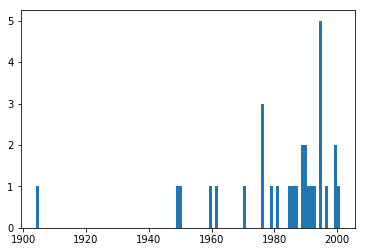

In [5]:
plot.hist(birthday_list, bins=100)

plot.show()

With this we see that most of the data is at the higher end of the spectrum but the mean is lower than the mode and so is the median. The bulk of the data seems to occur around low to mid nineties, with an average of about 1980. Most of the data, however, seems to be clustered around the mid 80 to mid 90's. Also, there seems to be a spikes at both ends.
But what can this tell us about where our data is distubuted?

### Measures of Spread

While measures of central tendency tell us alot of where most of our data sits within reason (well get into how this can change with other added variables), these don't tell us about how spread out or data is, just where it's clustered. What if we needed to know how far our data is spread out from our average number?

A good measure of spread should satisfy the following:

> - The measure should be proportional to the scatter of the data (small when the data are clustered together, and large when the data are widely scattered).
> - The measure should be independent of the number of values in the data set (otherwise, simply by taking more measurements the value would increase even if the scatter of the data was not increasing).
> - The measure should be independent of the mean (since now we are only interested in the spread of the data, not its central tendency).

The two most important measures of spread that are used to measure this are Variance and Standard Deviation

#### Variance and Standard Deviation


The variance is a measure of how far each value in the dataset is from the mean. It wont be neccessary for you to do the calulations by hand

> - Subtract the mean from each measured in the dataset. (This will also give you the distance of each value from the mean.)
> - Square each of the distances from the mean (so that they are all positive values, ), and add all of the squares together.
> - Divide the sum of the squares that were calculted in the step above by the number of values in the data set.

Standard Deviation is just the square root of variance which puts the units in standard deviation back into the same units as the data that you are measuring. This tends to be the most used and important of the two for a variety of reasons we'll get into below.



### But why is this important???

The Standard Deviation gives us a tool to measure what a range of "normal" data from looks like. STD as a value tells us that any observed value in that range isn't an outlier. Lets talk about heights to get a better example of STD and outliers.

<blockquote>
Adult male heights in a measured nation are on average 68 inches (or about 5'8) with a standard deviation of 3 inches. In that same nation, adult women are on average a bit shorter and less variable in height with a mean height of 62  inches (5'2) and standard deviation of 2.5 inches. 
</blockquote>



What this tells us is that for a man, a "normal" height is anywhere from 5'5" to 5'11", while for women in this nation a "normal" height is anywhere from about 4'11" to 5'5"

<img src="men_women_height.jpg">

### ACTIVITY:
Using pandas.series .std() method find the standard deviation on any column in the BMI data set. Turn to a partner and discuss what values would be "normal" or "weird" based off of the STD for a columns.


In [8]:
# TODO: import the BMI dataset using the std() 
bmi_df = pd.read_csv('bmi.csv')

## Distributions and Skew

Data can be "distributed" (or spread out about the mean) in different ways.
A distribution is a collection of counts of data on a variable and how they cluster (or don't) around the average. The data is arranged in order from smallest to largest and then they can be viewed in a graph. You've seen this before in plotting a histogram.

### How skew works and why it's important

Skew gives you a solid indication of not only how close the median and mean are to eachother, but it gives you an idea of which side most of your data will tend to. Recall that the median value tells you that half your data points lie below and above that point, while the mean is the averge. If more individual datapoints are on one side of the median, it forms a tail and this is said to be skewed. Let's take a took at a few distributions to get a better idea of how data can be skewed.

### Positive Skew
A positive skew indicates that the longer tail of the distribution of data points lies to the right of the median, and therefore so does the mean. What this means is that there's a bigger range of values beyond the median. A good example would be age distribution in the titanic dataset. Let's give this a look in a graph, then we'll get into some numbers.

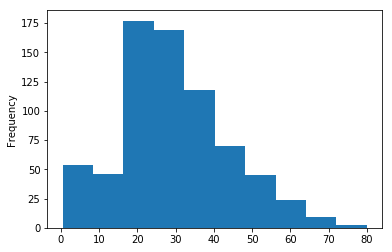

In [12]:
titanic_df = pd.read_csv('train.csv')
titanic_df.Age.plot.hist()

Now for the stats about this distribution.

In [23]:
#lets look at some descritive stats
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Explanation:
Becuase age cannot be negative, there's a finite about of range that can be observed on the left side of the median. Above the median however, there were elderly people whose advanced age skewed the average almost a point and a half from the mean.

### Negative Skew

A Negative skew indicates that the longer tail of the distribution of data points lies to the left of the median, and therefore so does the mean. What this means is that there's a bigger range of values below the median. A good example of this would be the distance that athletes who successfully completed a legal jump in the qualifying round of the 2012 Olympic men's long jump recorded. Let's take a look at this.

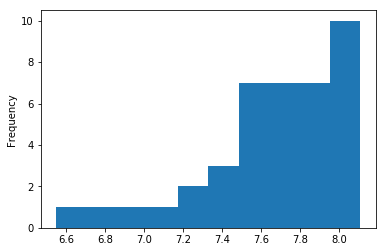

In [41]:
long_jump_df = pd.read_csv('long_jump_2012.csv')
long_jump_df['distance(meters)'].plot.hist()

In [38]:
long_jump_df.distance.describe()

count    40.000000
mean      7.674500
std       0.370003
min       6.550000
25%       7.500000
50%       7.765000
75%       7.955000
max       8.110000
Name: distance, dtype: float64

### Explanation:
While this range of values is much more clustered around the mean in this example, it's still observed that the mean is lower than the median, even though in this example it's just slightly slower. What this indicates is that ther are a greater range of data points below the median. In this dataset this makes since there's a maximum distance that a human can jump.

### Normal Distribution (no skew)

A normal distribution is one where the mean, median, and even the mode share the same value. This means that 50% of the data points are both below and above the median and the mean. This also means that the tails are roughly the same length on both sides of the median/mean.

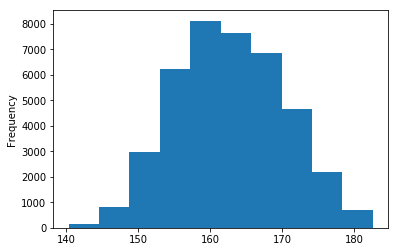

In [46]:
height_df = pd.read_csv('height.csv')
height_df['Mean height(cm)'].plot.hist()

In [47]:
height_df['Mean height(cm)'].describe()

count    40400.000000
mean       162.690876
std          7.565018
min        140.290050
25%        157.143326
50%        162.474829
75%        168.350593
max        182.567309
Name: Mean height(cm), dtype: float64

### Exercise:

Using any of the datasets that we've seen so far, make a histogram using .plot.hist(), then the .describe() on 3 columns and with a partner discuss what kind of distributions you ecounter, as well as how the data is skewed and what that means for those features

In [ ]:
# Do work here. 